##  Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np


##  Load the Dataset

In [2]:
df = pd.read_csv("usercode/housing.csv")
df.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

##  Explore the Dataset

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##  Explore the Variables 

In [4]:
df.iloc[:,:-1].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


## Check for Null Values 

In [5]:
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


##  Prepare the Data

In [6]:
df = pd.get_dummies(df)
df = df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,8]]
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False,342200.0


##  Create the Dependent Variable  

In [7]:
y = df.iloc[:,-1]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

##  Create the Independent Variable 

In [8]:
x = df.iloc[:,:-1]
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False


## Split the Data with Scikit-learn

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43)

##  Train and Fit the Model

In [10]:
train_x_new= sm.add_constant(x_train)
model = sm.OLS(y_train,train_x_new.astype('float')).fit()


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        16:26:12   Log-Likelihood:            -1.9249e+05
No. Observations:               15324   AIC:                         3.850e+05
Df Residuals:                   15311   BIC:                         3.851e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.838e+06   8.57e+04    -21.452      0.000   -2.01e+06   -1.67e+06
longitude                  -2.636e+04   1187.346    -22.205      0.000   -2.87e+04    -2.4e+04
latitude                   -2.515e+04   1169.300    -21.511      0.000   -2.74e+04   -2.29e+04
housing_median_age          1052.8379     51.123     20.594      0.000     952.631    1153.045
total_rooms                   -6.5613      0.926     -7.083      0.000      -8.377      -4.746
total_bedrooms               100.8903      8.100     12.455      0.000      85.013     116.768
population                   -40.4693      1.314    -30.808      0.000     -43.044     -37.895
households                    55.2858      8.839      6.255      0.000      37.960      72.612
median_income               3.917e+04    395.022     99.170      0.000    3.84e+04    3.99e+04
ocean_proximity_<1H OCEAN  -3.868e+05   1.79e+04    -21.552      0.000   -4.22e+05   -3.52e+05
ocean_proximity_INLAND     -4.271e+05   1.68e+04    -25.350      0.000    -4.6e+05   -3.94e+05
ocean_proximity_ISLAND     -2.513e+05   3.39e+04     -7.412      0.000   -3.18e+05   -1.85e+05
ocean_proximity_NEAR BAY   -3.904e+05   1.85e+04    -21.133      0.000   -4.27e+05   -3.54e+05
ocean_proximity_NEAR OCEAN -3.828e+05   1.84e+04    -20.850      0.000   -4.19e+05   -3.47e+05
==============================================================================
Omnibus:                     3533.302   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11513.048
Skew:                           1.164   Prob(JB):                         0.00
Kurtosis:                       6.551   Cond. No.                     2.54e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##  Plot the Findings

Text(0.5, 1.0, 'Linear Correlation Between Median Income and Median House Value')

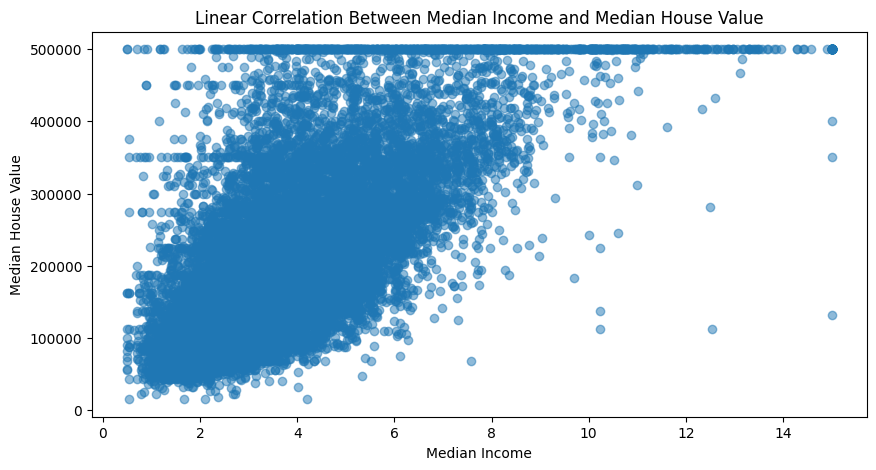

In [14]:
plt.figure(figsize = (10,5))
plt.scatter(df['median_income'],df['median_house_value'],alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title("Linear Correlation Between Median Income and Median House Value")


In [16]:
# Testing
X_test = sm.add_constant(x_test)
predictions = model.predict(X_test)


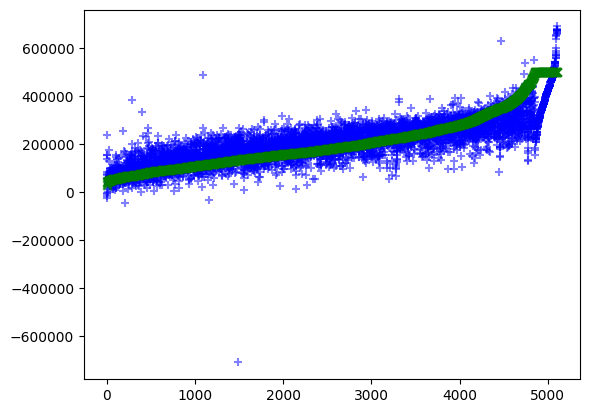

In [19]:
# Plotting Actual Vs Predicted
df= pd.DataFrame({"Y_test": y_test,"predicted": predictions})
df.sort_values(['Y_test','predicted'],inplace=True,ignore_index=True)
df['idx'] = range(len(df))
plt.scatter(df.idx,df.predicted,c='blue',alpha=0.5,marker='+')
plt.scatter(df.idx,df.Y_test,c='green',alpha=0.3,marker='x')
plt.show()

In [23]:
import math
m=mean_squared_error(y_test,predictions,multioutput='raw_values')
sqrt  = math.sqrt(m)
print(sqrt)

67460.19828483551


# End